# Проект "Принятие решений в бизнесе"

#### Рассматриваются бизнес-показатели крупного интернет магазина и гипотезы по их улучшению. Необходимо приоритезировать гипотезы и проанализировать результаты A/B-теста.

#### Предоставлены данные о имеющихся гипотезах и результатах A/B-теста.

1 Приоритезируем гипотезы.

In [1]:
# импортируем библиотеки

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# читаем csv-файл

data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

pd.options.display.max_colwidth = 110
print(data.head(10))

                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
7              Добавить форму подписки на все основные страницы, чтобы собрать б

In [3]:
# приводим названия столбцов к нижнему регистру

data.columns = data.columns.str.lower()

In [4]:
# применяем метод ICE

data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data['ICE'] = data['ICE'].round(2)
print(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

По данным метода ICE лидирует гипотеза 'Запустить акцию, дающую скидку на товар в день рождения'. В первой тройке гипотезы 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' и 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.

In [5]:
# применяем метод RICE

data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

По данным метода RICE лидирует гипотеза с номером 7 ('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'). В первой тройке гипотезы 2 и 0. 8-я только на четвертом месте. Так получилось из за того, что охват для 7-й гипотезы равен 10, что существенно выше, чем у других.

2 Анализируем результаты A/B-теста.

In [6]:
# читаем csv-файлы

orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

print(orders.head(5))
print('------------------------------')
print(visitors.head(5))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
------------------------------
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [47]:
# изучим данные на наличие пропусков
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [46]:
# проверим наличие дубликатов в данных
print('Дубликатов в orders:', orders.duplicated().sum())
print('Дубликатов в visitors:', visitors.duplicated().sum())

Дубликатов в orders: 0
Дубликатов в visitors: 0


Данные не содержат пропусков и дубликатов.

In [58]:
# сохраним данные о пользователях, вошедших в группу A и B, в отдельные датафреймы,
# затем объединим их в один датафрейм и удалим дубликаты по столбцу visitorid:
 
A = orders[orders['group'] == 'A']
B = orders[orders['group'] == 'B']
orders_fixed = pd.concat([A, B]).drop_duplicates(subset = 'visitorid').reset_index(drop=True)
print(orders_fixed[orders_fixed['group'] == 'A'].count())
print(orders_fixed[orders_fixed['group'] == 'B'].count())
display(orders_fixed)
orders_fixed.info()

transactionid    503
visitorid        503
date             503
revenue          503
group            503
dtype: int64
transactionid    528
visitorid        528
date             528
revenue          528
group            528
dtype: int64


,transactionid,visitorid,date,revenue,group
0,2961555356,4069496402,2019-08-15,400,A
1,2626614568,78758296,2019-08-15,1044,A
2,1576988021,295230930,2019-08-15,13710,A
3,3649131742,879864040,2019-08-15,4008,A
4,2809384911,3213223594,2019-08-15,7370,A
...,...,...,...,...,...
1026,2116724386,2146711261,2019-08-14,15380,B
1027,38478481,1197745035,2019-08-14,8600,B
1028,3592955527,608641596,2019-08-14,16490,B
1029,2662137336,3733762160,2019-08-14,6490,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1031 non-null   int64 
 1   visitorid      1031 non-null   int64 
 2   date           1031 non-null   object
 3   revenue        1031 non-null   int64 
 4   group          1031 non-null   object
dtypes: int64(3), object(2)
memory usage: 40.4+ KB


In [7]:
# приводим названия столбцов к нижнему регистру

orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

In [8]:
# создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates()

In [9]:
# cоберём агрегированные кумулятивные по дням данные о заказах

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [10]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [11]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

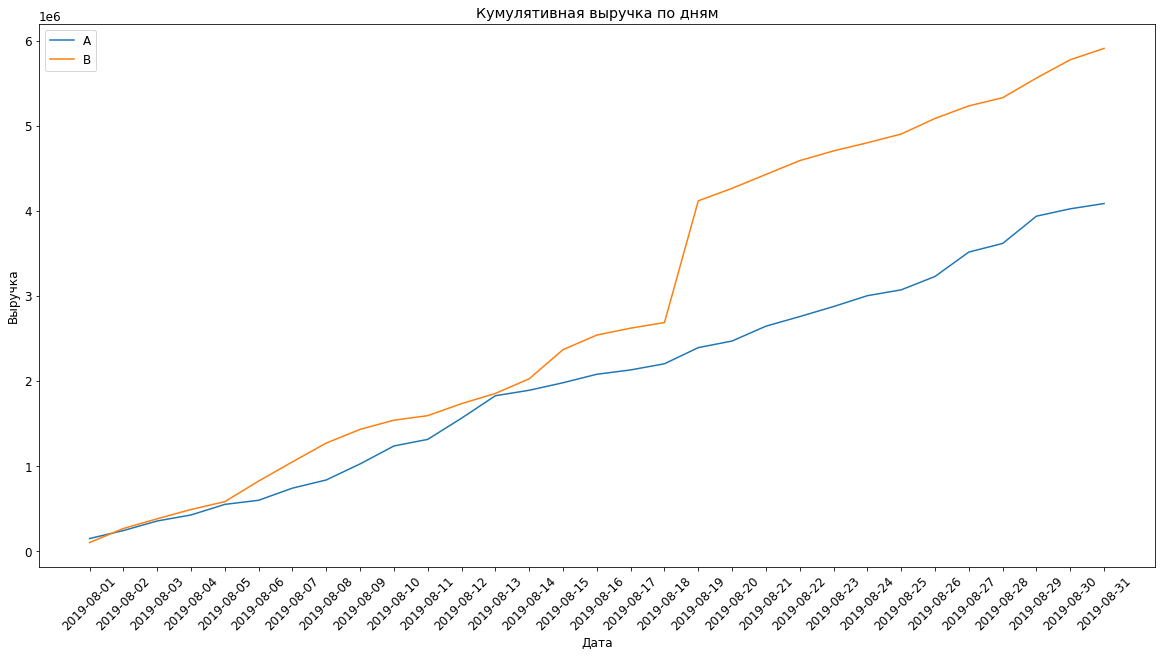

In [49]:
# Задаем параметры графика

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = '12'

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation = 45)
plt.legend()

Выручка группы А равномерно увеличивается в течение всего теста. Графики выручки группы В резко растет 18-го мая. Это может свидетельствовать об резком увеличении числа заказов, либо о появлении очень дорогих заказов в эту дату.

Построим графики среднего чека по группам.

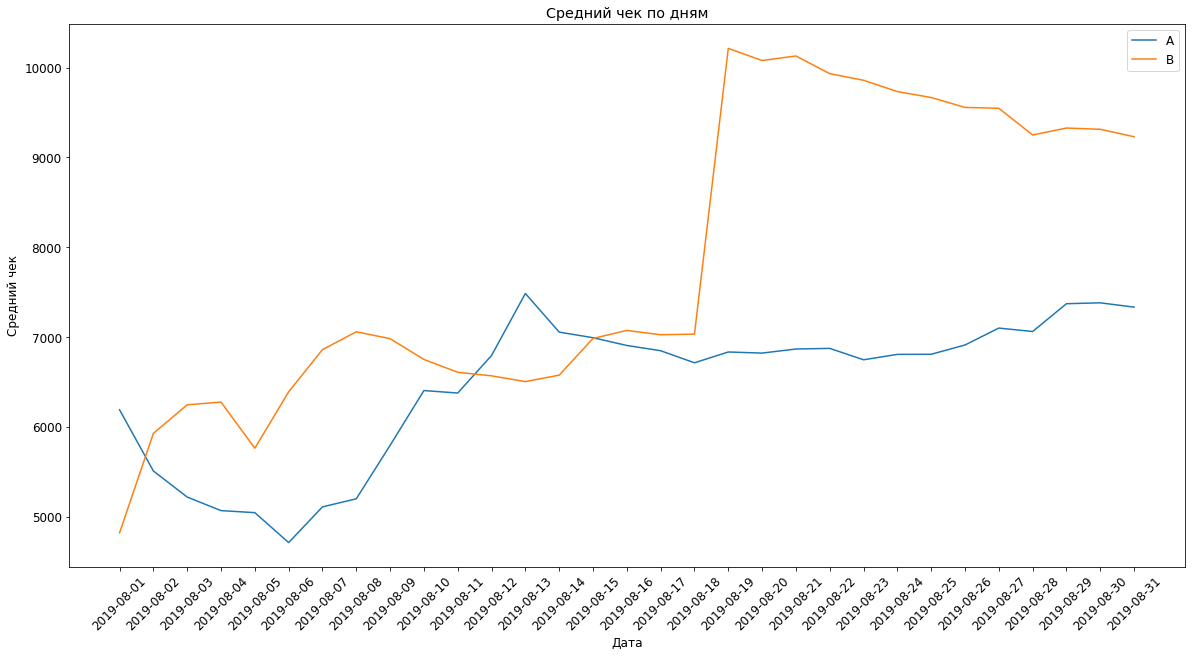

In [51]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = '12'

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Средний чек по дням')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Средний чек становится стабильным ближе к концу теста. Для группы В видна та же аномалия, что и на графике куммулятивной выручки. Если мы видим ее на графике среднего чека, значит дело не в количестве заказов, а в их цене.

Построим график относительного различия для среднего чека.

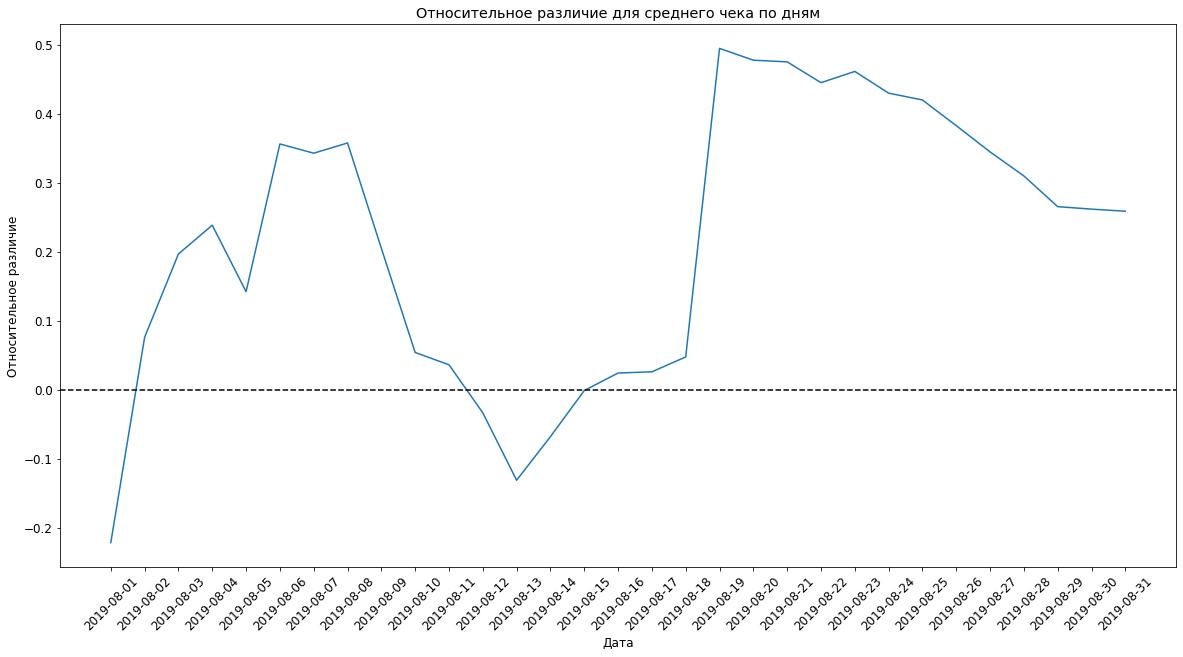

In [52]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = '12'

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное различие для среднего чека по дням')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.xticks(rotation = 45)
plt.show()

Если бы не выброс, описанный ранее, график стабилизировался бы около нулевого уровня во второй половине наблюдаемого периода.

Аналогично проанализируем график кумулятивной конверсии.

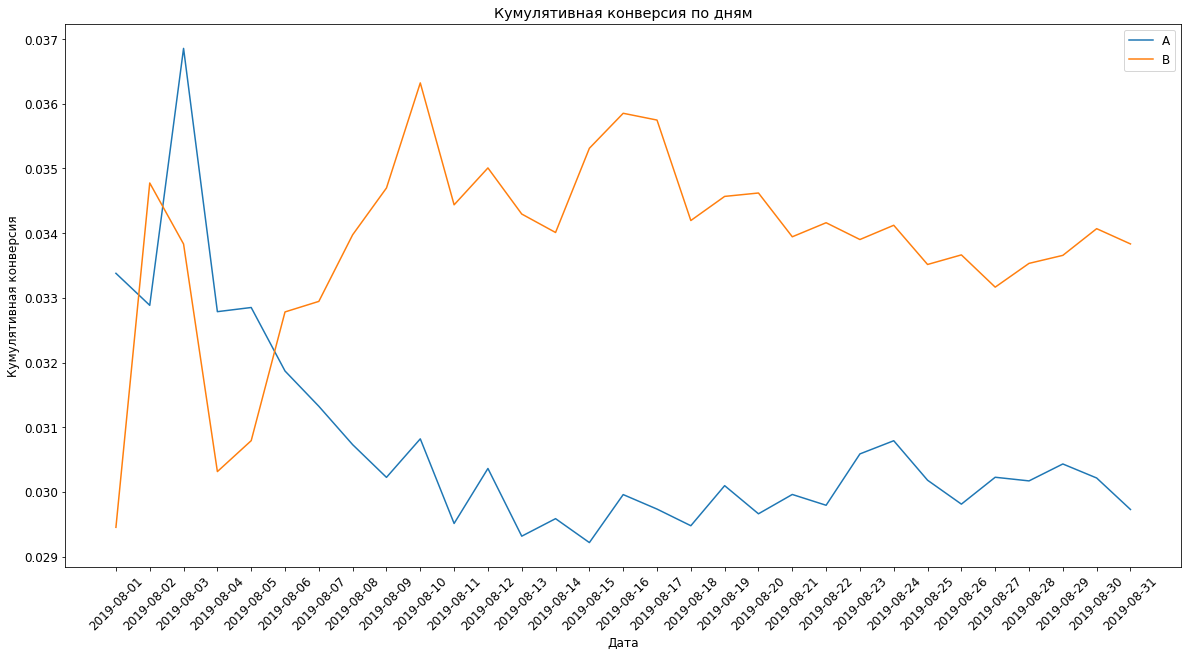

In [53]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по дням')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.xticks(rotation = 45)
plt.legend()

После нестабильности в начале периода графики перескекаются, после чего конверсия группы В уходит вверх и стабилизируется, конверсия А падает и стабилизируется.

Построим график относительного различия кумулятивных конверсий.

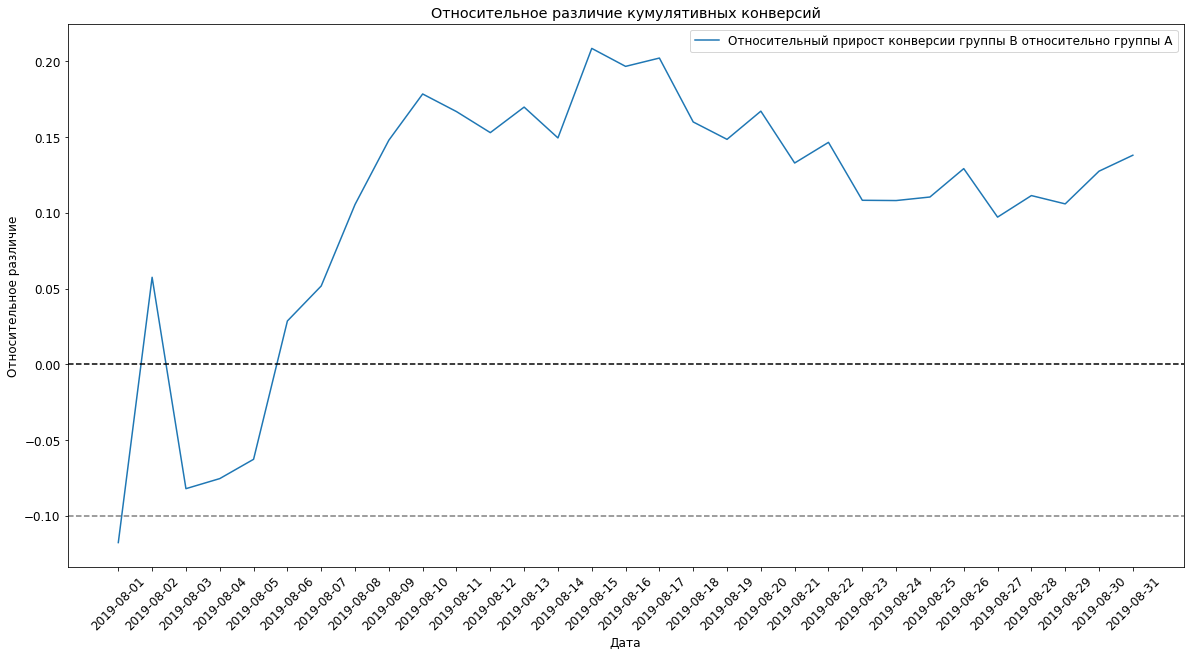

In [54]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное различие кумулятивных конверсий')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.xticks(rotation = 45)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

В начале наблюдаемого периода конверсия группы В проигрывала группе А, затем опередила ее и стабилизировалась.

Построим точечную диаграмму числа заказов на одного пользователя.

In [ ]:
# группируем заказы по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

# строим график
plt.rcParams['font.size'] = '12'
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Число заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Число заказов')

Большого количества пользователей с больше чем одним заказом не наблюдается. Но их точная доля не ясна — непонятно, считать их аномалиями или нет.

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя.

In [19]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше 2-х заказов. И только 1% пользователей заказывал более 4-х раз.
Выберем 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.

Построим точечный график стоимости заказов.

Text(0, 0.5, 'Стоимость')

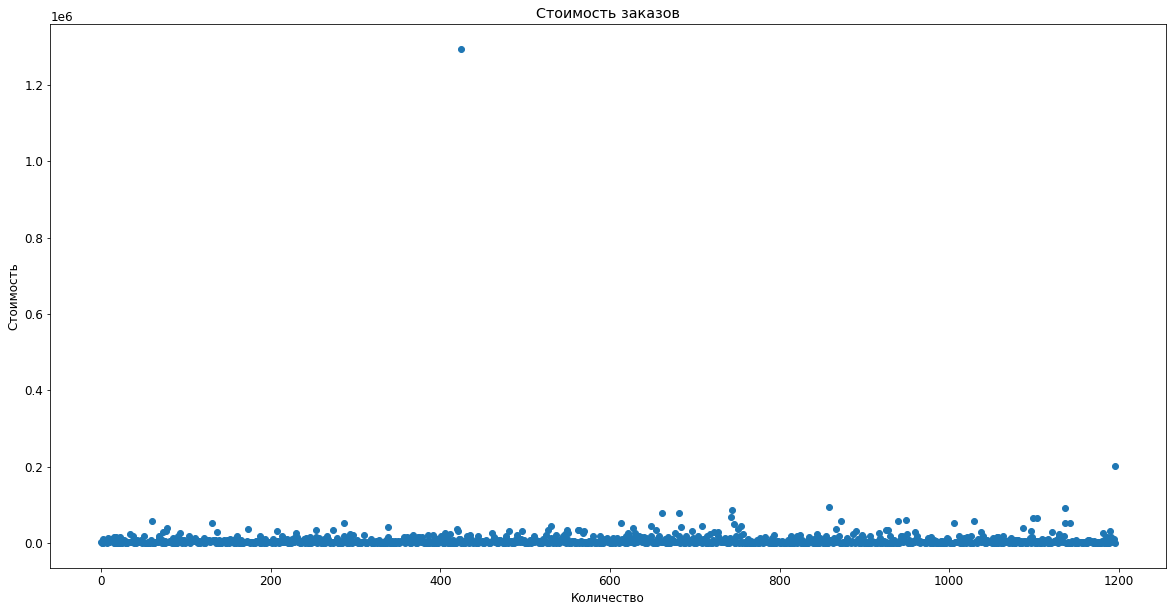

In [44]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Количество')
plt.ylabel('Стоимость')

Наблюдается несколько выделяющихся заказов и один сверхдорогой. Им может быть обусловлен выброс на графиках выручки и среднего чека.

Посчитаем 95-й и 99-й перцентили стоимиости заказов.

In [21]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рублей. Примем 50 000 р за верхнюю границу.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем  количестве заказов между группами есть.

In [22]:
# подготовим данные

#visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))    
    
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'visitorid', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [24]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем среднем числе заказов', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value 0.017
Относительное различие в среднем среднем числе заказов 0.138


По необработанным данным в среднем числе заказов групп A и B имеются существенные различия.
P-value = 0.017, меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, следует отвергнуть. Относительный выигрыш группы B равен 13.8%.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [26]:
print('P-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value 0.729
Относительное различие в среднем чеке 0.259


P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, относительное различие в среднем чеке можем признать полученным случайным образом.

Примем за аномальных пользователей тех, кто совершил более 4-х заказов или совершил заказ дороже 50 000 рублей. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 50 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

Узнаем, сколько всего аномальных пользователей.

In [27]:
max_orders = 4
max_revenue = 50000

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_orders]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > max_orders]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
1137     759473111
949      887908475
744      888512513
1103    1164614297
Name: visitorid, dtype: int64
21


86 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть. Подготовим выборки количества заказов по пользователям по группам теста.

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [59]:
print('P-value','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем среднем числе заказов', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value 0.012
Относительное различие в среднем среднем числе заказов 0.160


Результаты по среднему количеству заказов существенно не изменились. Найдем соответствующие значения по среднему чеку.

Посчитаем статистическую значимость различий в среднем чеке между группами теста по очищенным данным. Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [31]:
print('P-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие в среднем среднем чеке',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


P-value 0.715
Относительное различие в среднем среднем чеке 0.032


P-value практически не изменилось.

Имеющиеся факты:
1)Присутствуют статистически значимые различия по среднему количеству заказов между группами и по необработанным данным, и по данным после фильтрации аномалий;
2)Нет статистически значимого различия по среднему чеку между группами ни по необработанным данным, ни по данным после фильтрации аномалий;
3)График различия конверсии между группами показывает, что результаты группы А хуже результатов группы В. Тенденции к улучшению не наблюдается.
4)График различия среднего чека показывает, что, за вычетом выброса 18-го мая, результаты групп практически идентичны.

Исходя из обнаруженных фактов, тест следует признать успешным и остановить. При отсутствии разницы в среднем чеке, группа В выигрывает у группы А по среднему количеству заказов.